In [ ]:
# Import datasets & libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

# 1. Exploring the CIFAR-100 Dataset

In [ ]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

169017344/169001437 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


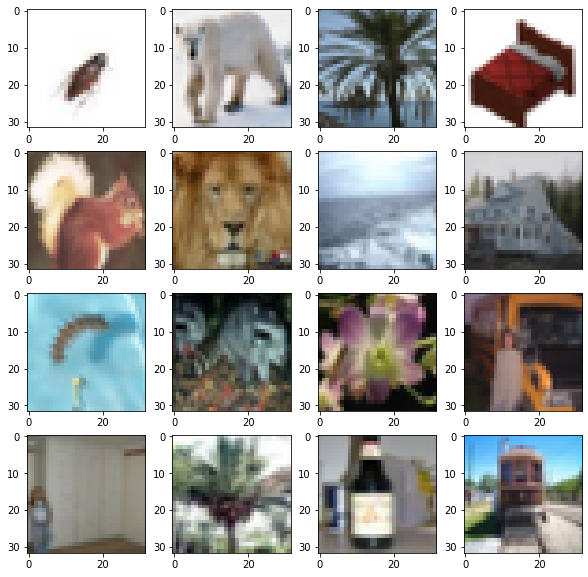

In [ ]:
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

# 2. Preprocessing for CIFAR-100 dataset

In [ ]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# 3. Build CNN models for classification task

In [ ]:
# Import Libraries for CNN
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

In [ ]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

## 3.1 A simple CNN model with RMSprop optimizer and Adam optimizer

In [ ]:
# Model
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [ ]:
# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Training and testing model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

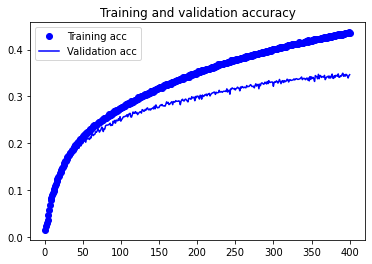

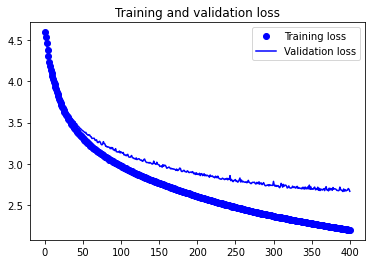

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 5ms/step - loss: 2.6309 - acc: 0.3593
accuracy on test set: acc of 35.92999875545502


In [ ]:
# Using Adam optimizer

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

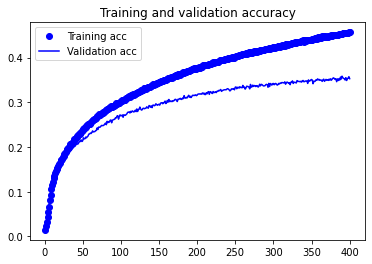

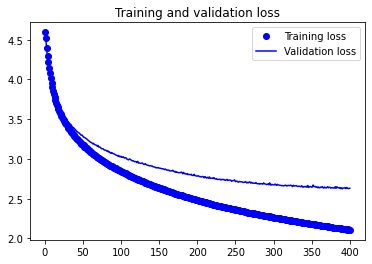

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 5ms/step - loss: 2.6010 - acc: 0.3563
accuracy on test set: acc of 35.62999963760376


## 3.2 Increased filters in CNN and increased conv layers in CNN

In [ ]:
# Build CNN model with increase of filters
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

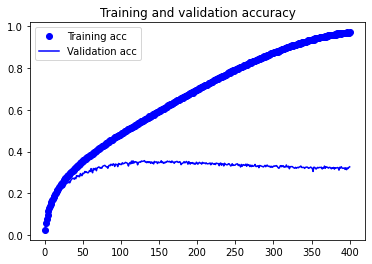

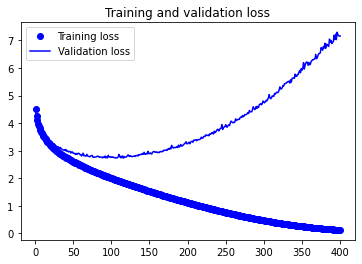

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 2s 6ms/step - loss: 7.0105 - acc: 0.3373
accuracy on test set: acc of 33.730000257492065


In [ ]:
# Build CNN model with increase of convolution layers
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))


# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

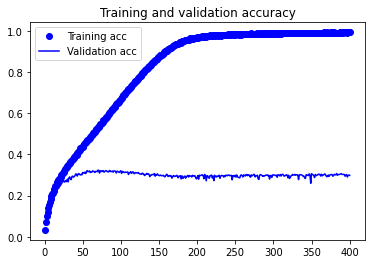

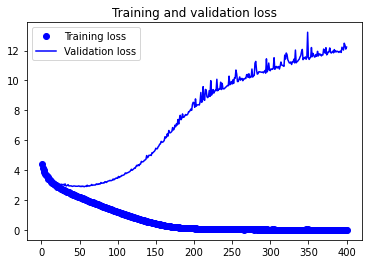

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 2s 5ms/step - loss: 12.1721 - acc: 0.3017
accuracy on test set: acc of 30.169999599456787


## 3.3 Simple model with data augmentation and simple model added dropout layers with data augmentation

In [ ]:
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=400,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

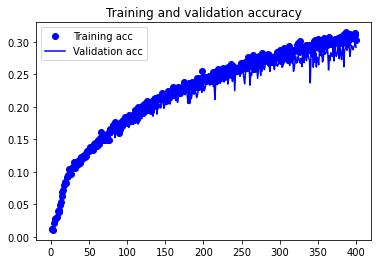

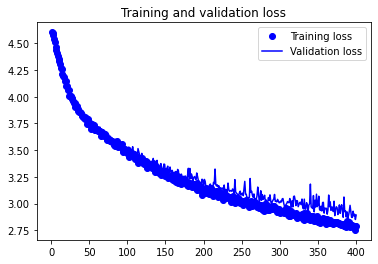

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 4ms/step - loss: 2.8913 - acc: 0.2942
accuracy on test set: acc of 29.420000314712524


In [ ]:
# CNN increased layers and nodes + Dropout with data augmentation
model = Sequential()
# Stack 1
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Stack 2
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=400,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

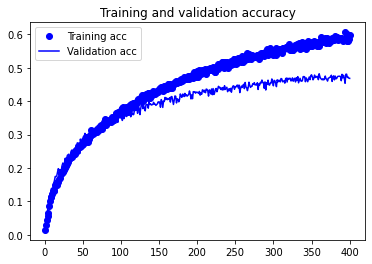

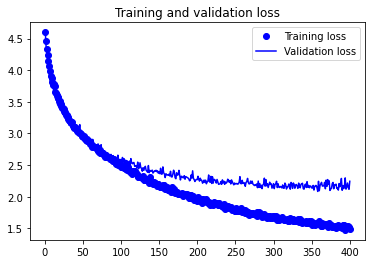

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 2s 7ms/step - loss: 2.2111 - acc: 0.4928
accuracy on test set: acc of 49.27999973297119


## 3.4 Batch norm model 1

In [ ]:
#Model with Batch norm type 1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
# Stack 1
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Stack 2
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=700,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

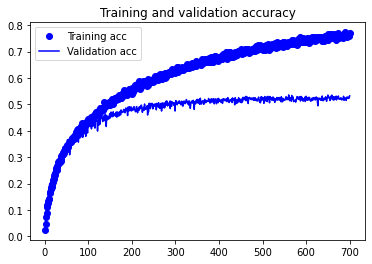

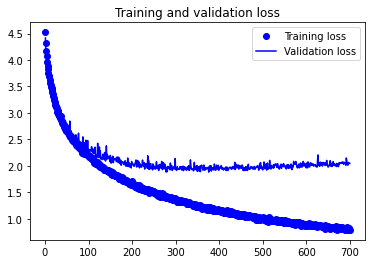

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 2s 8ms/step - loss: 1.9661 - acc: 0.5448
accuracy on test set: acc of 54.47999835014343


## 3.5 Batch norm model 2

In [ ]:
# import BatchNormalization
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='softmax'))
model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)      

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=700,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

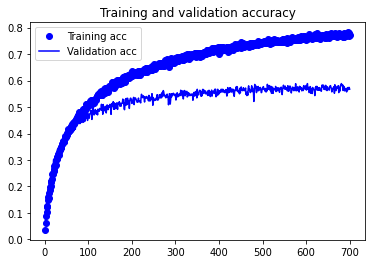

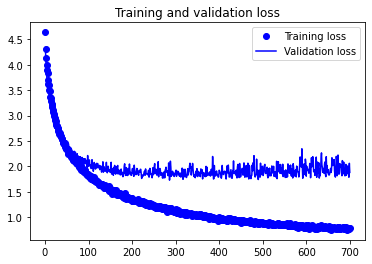

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

## 3.6 Batch Norm model 3

In [ ]:
# Batch norm model 3
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 128)      

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

100/100 [==============================] - 12s 116ms/step - loss: 1.9742 - acc: 0.4778 - val_loss: 2.0093 - val_acc: 0.4676
Epoch 59/350
100/100 [==============================] - 12s 116ms/step - loss: 2.0124 - acc: 0.4719 - val_loss: 2.2211 - val_acc: 0.4331
Epoch 60/350
100/100 [==============================] - 11s 115ms/step - loss: 1.9399 - acc: 0.4811 - val_loss: 2.1851 - val_acc: 0.4337
Epoch 61/350
100/100 [==============================] - 12s 116ms/step - loss: 1.9640 - acc: 0.4858 - val_loss: 2.0321 - val_acc: 0.4692
Epoch 62/350
100/100 [==============================] - 12s 115ms/step - loss: 1.9379 - acc: 0.4847 - val_loss: 1.9887 - val_acc: 0.4752
Epoch 63/350
100/100 [==============================] - 13s 126ms/step - loss: 1.9462 - acc: 0.4848 - val_loss: 2.1070 - val_acc: 0.4450
Epoch 64/350
100/100 [==============================] - 12s 116ms/step - loss: 1.9090 - acc: 0.4914 - val_loss: 1.9928 - val_acc: 0.4746
Epoch 65/350
100/100 [==============================] 

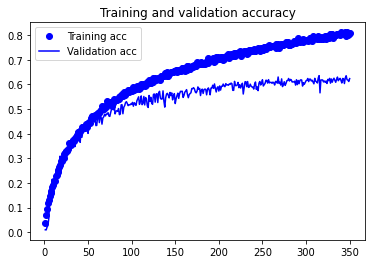

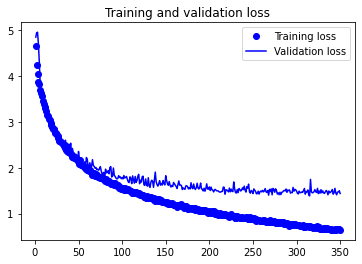

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 5s 14ms/step - loss: 1.4327 - acc: 0.6282
accuracy on test set: acc of 62.81999945640564


##3.7 Batch norm model 4 - The best model

In [ ]:
# Batch norm model 4
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)      

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 40/350
100/100 [==============================] - 29s 293ms/step - loss: 1.8481 - acc: 0.4902 - val_loss: 2.0579 - val_acc: 0.4503
Epoch 41/350
100/100 [==============================] - 29s 293ms/step - loss: 1.8030 - acc: 0.5105 - val_loss: 2.1553 - val_acc: 0.4360
Epoch 42/350
100/100 [==============================] - 29s 293ms/step - loss: 1.7656 - acc: 0.5208 - val_loss: 2.0647 - val_acc: 0.4568
Epoch 43/350
100/100 [==============================] - 29s 294ms/step - loss: 1.7834 - acc: 0.5148 - val_loss: 2.0246 - val_acc: 0.4623
Epoch 44/350
100/100 [==============================] - 29s 292ms/step - loss: 1.7587 - acc: 0.5177 - val_loss: 2.0513 - val_acc: 0.4598
Epoch 45/350
100/100 [==============================] - 29s 293ms/step - loss: 1.7126 - acc: 0.5259 - val_loss: 2.0400 - val_acc: 0.4552
Epoch 46/350
100/100 [==============================] - 29s 294ms/step - loss: 1.7056 - acc: 0.5259 - val_loss: 2.1812 - val_acc: 0.4386
Epoch 47/350
100/100 [===================

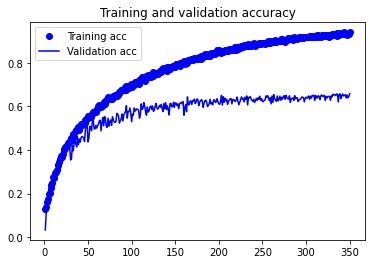

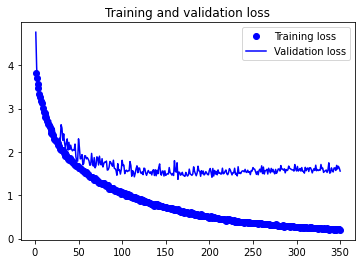

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 11s 35ms/step - loss: 1.5613 - acc: 0.6615
accuracy on test set: acc of 66.14999771118164


In [ ]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/results/

/content/drive/MyDrive/results


In [ ]:
!pwd
model.save('66%_accuracy_on_test.h5')

In [ ]:
from keras.models import load_model
model = load_model('66%_accuracy_on_test.h5')

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 41s 37ms/step - loss: 1.5613 - acc: 0.6615
accuracy on test set: acc of 66.14999771118164


In [ ]:
# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(test_images)
print(test_labels.shape[0])
for i in range(test_labels.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(test_labels[i]))

cm = confusion_matrix(prediction, true_labels)

10000


In [ ]:
# Name of all classes in CIFAR-100
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 
'aquarium' ,'fish', 'ray', 'shark', 'trout', 
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 
'bottles', 'bowls', 'cans', 'cups', 'plates', 
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
'bear', 'leopard', 'lion', 'tiger', 'wolf', 
'bridge', 'castle', 'house', 'road', 'skyscraper', 
'cloud', 'forest', 'mountain', 'plain', 'sea', 
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
'crab', 'lobster', 'snail', 'spider', 'worm', 
'baby', 'boy', 'girl', 'man', 'woman', 
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
'maple', 'oak', 'palm', 'pine', 'willow', 
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

[[67  0  0 ...  0  0  0]
 [ 0 85  1 ...  0  1  0]
 [ 0  0 38 ...  0  4  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  4 ...  0 41  0]
 [ 0  0  0 ...  0  0 67]]


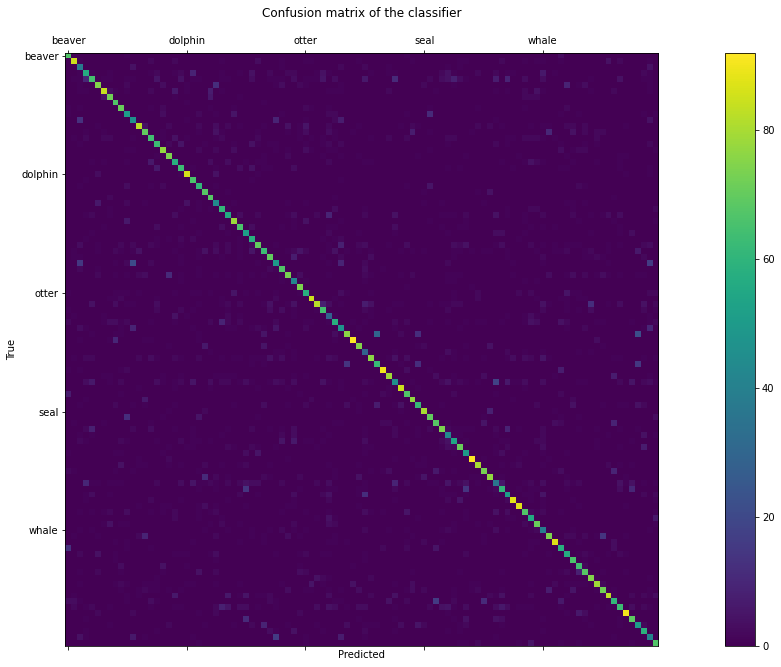

In [ ]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calculating f1 score
from sklearn.metrics import f1_score
print(f"f1 score: {f1_score(true_labels, prediction, average='weighted')}")

f1 score: 0.6636194116852772


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, prediction, target_names=classes, digits=5))

                   precision    recall  f1-score   support

           beaver    0.93056   0.67000   0.77907       100
          dolphin    0.74561   0.85000   0.79439       100
            otter    0.70370   0.38000   0.49351       100
             seal    0.47899   0.57000   0.52055       100
            whale    0.35912   0.65000   0.46263       100
         aquarium    0.63025   0.75000   0.68493       100
             fish    0.66142   0.84000   0.74009       100
              ray    0.80000   0.72000   0.75789       100
            shark    0.97101   0.67000   0.79290       100
            trout    0.81609   0.71000   0.75936       100
          orchids    0.60714   0.51000   0.55435       100
          poppies    0.55294   0.47000   0.50811       100
            roses    0.63359   0.83000   0.71861       100
       sunflowers    0.58824   0.70000   0.63927       100
           tulips    0.59259   0.64000   0.61538       100
          bottles    0.66316   0.63000   0.64615       